In [1]:
import os
import importlib
from geeutils import geeutils
importlib.reload(geeutils)
from geeutils import tiffutils
importlib.reload(tiffutils)

data_dir = os.path.join('data')

# Retrieve imagery from GEE
This uses polygon geojsons saved for each site

In [2]:
start_date = '2019-04-01'
end_date = '2019-05-12'

# sitenames = ['hawaiikaunaoabayhawaii', 'hawaiikeawaikimakahaoahu', 'hawaiikoholalagoonoahu', 'hawaiinanakulistreamoahu', 'hawaiisharkscoveoahu', 'hawaiiternisland']
sitenames = os.listdir(os.path.join(data_dir, 'siteinfo'))
sitenames = ['hawaiikeawaikimakahaoahu']

In [ ]:
for sitename in sitenames:

  geeutils.retrieve_imagery(sitename=sitename, 
                            start_date = start_date,
                            end_date = end_date,
                            data_dir  = data_dir, # this will be autogenerated with sitename
                            polygon = None#, # load this from the polygon file for the site
                          #   satnames = ['S2']#['L8', 'L7']
  )

No images found for L5 in the given date range and polygon.
Processing image: LANDSAT/LE07/C02/T1_TOA/LE07_064045_20190405
scale of red: 30
----------------------------------------------------------------
scale of pancromatic: 15
Download URL: https://earthengine.googleapis.com/v1/projects/945225499944/thumbnails/d8b25270ce3a910c3ab76f74d03112bd-97c8816b6ba04f4762342a4f14b9380e:getPixels
data\sat_images\hawaiikeawaikimakahaoahu\L7\LE07_064045_20190405_image.zip
File downloaded successfully as data\sat_images\hawaiikeawaikimakahaoahu\L7\LE07_064045_20190405_image.zip
File unzipped successfully into data\sat_images\hawaiikeawaikimakahaoahu\L7
data\sat_images\hawaiikeawaikimakahaoahu\L7\LE07_064045_20190405.B1.tif
LE07_064045_20190405.B1.tif
B1
LE07_064045_20190405.B
data\sat_images\hawaiikeawaikimakahaoahu\L7\LE07_064045_20190405.B2.tif
LE07_064045_20190405.B2.tif
B2
LE07_064045_20190405.G
data\sat_images\hawaiikeawaikimakahaoahu\L7\LE07_064045_20190405.B3.tif
LE07_064045_20190405.B3.tif

# Clean up excess band tiff files

In [ ]:
for sitename in sitenames:
    tiffutils.clean_up_gee_downloads(os.path.join(data_dir, 'sat_images', sitename))

L7-------------------------
G
UDM
NIR
PAN
B
R
what about this function?
{'064045_20190405'}
permission denied stoopid
G
UDM
NIR
PAN
B
R
what about this function?
{'064045_20190421'}
permission denied stoopid
G
UDM
NIR
PAN
B
R
what about this function?
{'064045_20190507'}
permission denied stoopid
G
UDM
NIR
PAN
B
R
what about this function?
{'065045_20190412'}
permission denied stoopid
G
UDM
NIR
PAN
B
R
what about this function?
{'065045_20190428'}
permission denied stoopid
L8-------------------------
G
UDM
NIR
PAN
B
R
what about this function?
{'065045_20190404'}
permission denied stoopid
G
UDM
NIR
PAN
B
R
what about this function?
{'065045_20190420'}
permission denied stoopid
G
UDM
NIR
PAN
B
R
what about this function?
{'065045_20190506'}
permission denied stoopid
S2-------------------------
G
UDM
NIR
B
R
what about this function?
{'20190404T211919'}
permission denied stoopid
permission denied stoopid
permission denied stoopid
permission denied stoopid
permission denied stoopid
G
UDM


hawaiikeawaikimakahaoahu-------------------------------------
data\sat_images\hawaiikeawaikimakahaoahu\L7\L7_20190405_064045.tif
(5, 54, 33)


c:\Users\jnicolow\Documents\research\CRC\GEE_image_download\geeutils\tiffutils.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


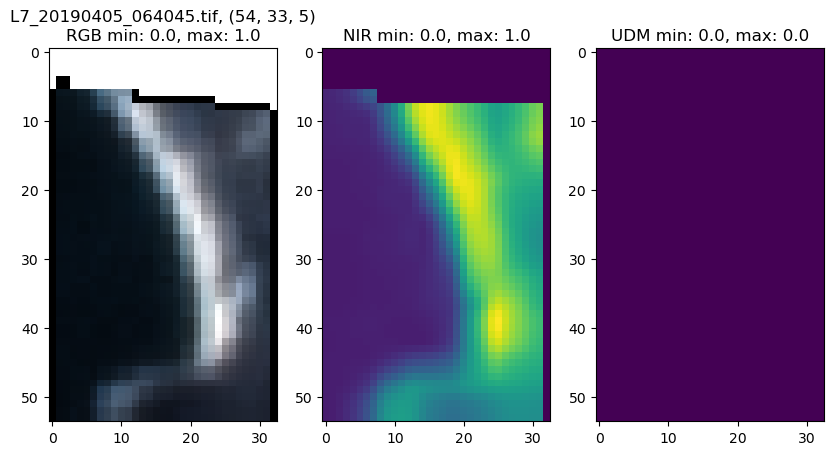

data\sat_images\hawaiikeawaikimakahaoahu\L7\L7_20190412_065045.tif
(5, 54, 33)


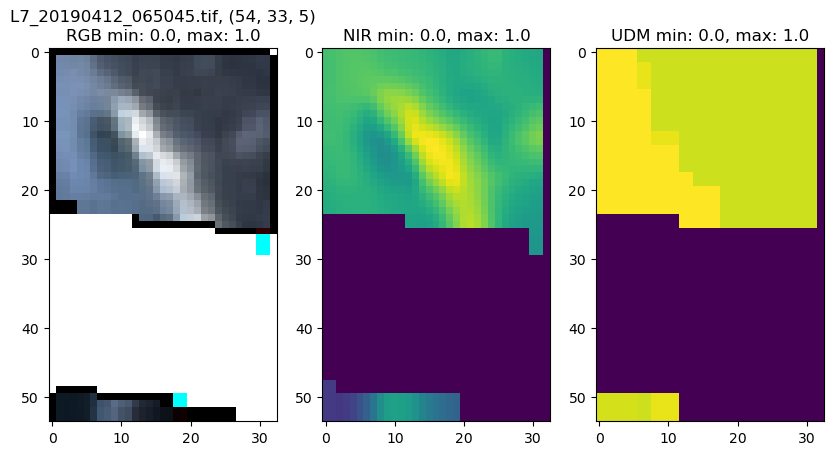

data\sat_images\hawaiikeawaikimakahaoahu\L7\L7_20190421_064045.tif
(5, 54, 33)


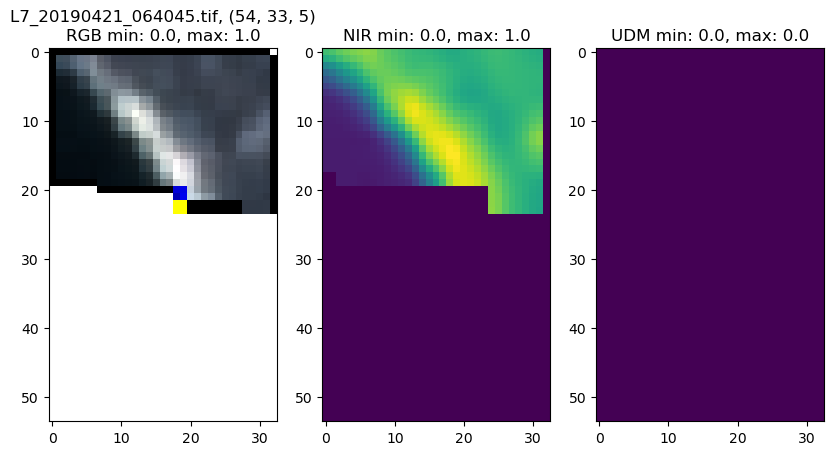

data\sat_images\hawaiikeawaikimakahaoahu\L7\L7_20190428_065045.tif
(5, 54, 33)


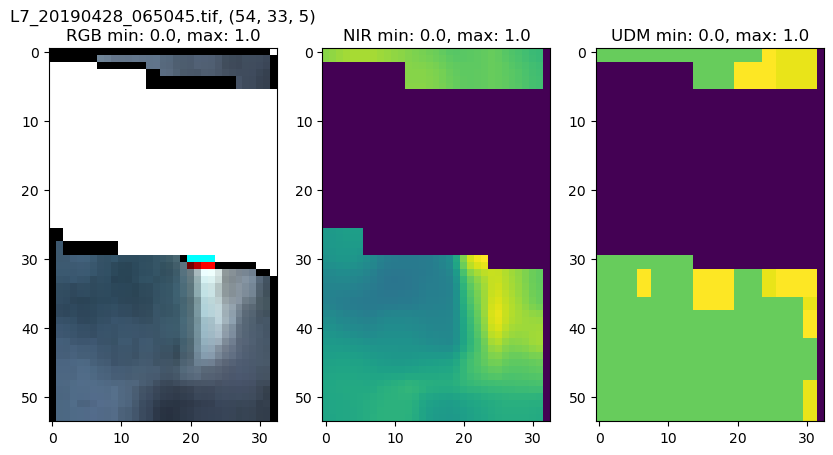

data\sat_images\hawaiikeawaikimakahaoahu\L7\L7_20190507_064045.tif
(5, 54, 33)


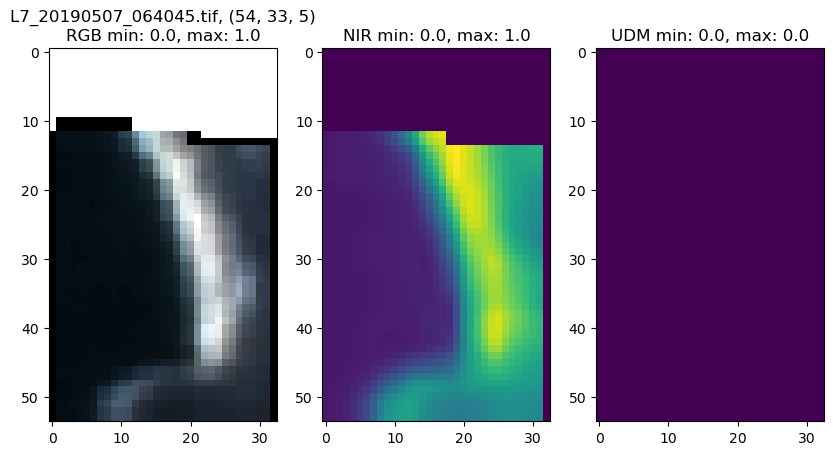

data\sat_images\hawaiikeawaikimakahaoahu\L8\L8_20190404_065045.tif
(5, 54, 33)


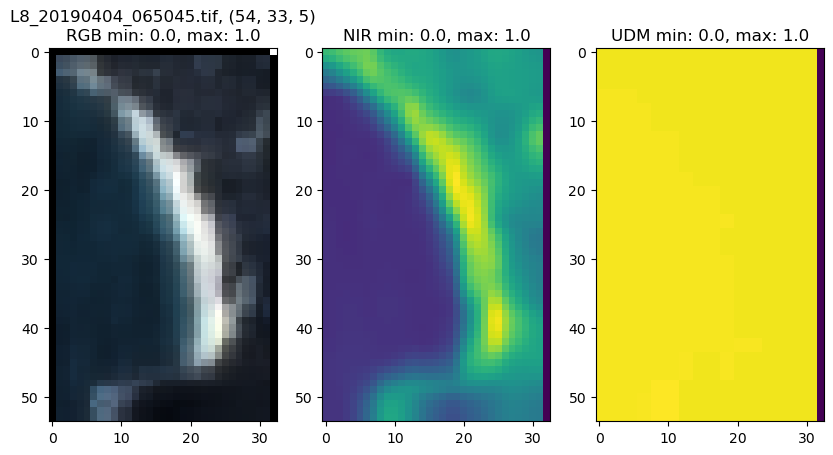

data\sat_images\hawaiikeawaikimakahaoahu\L8\L8_20190420_065045.tif
(5, 54, 33)


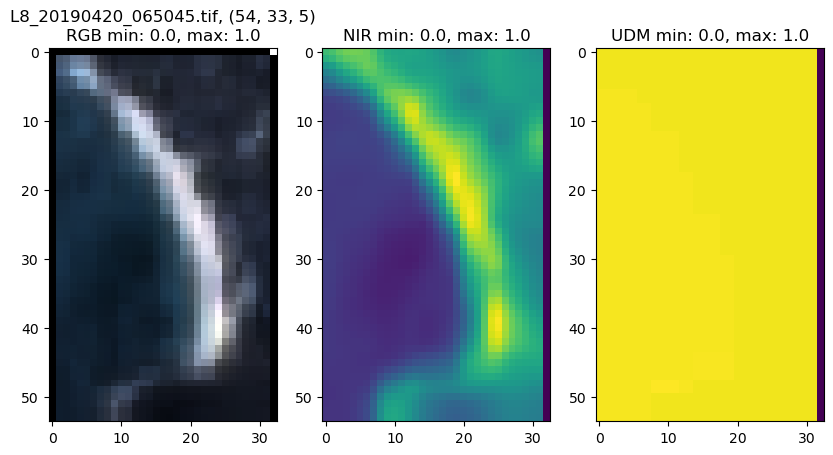

data\sat_images\hawaiikeawaikimakahaoahu\L8\L8_20190506_065045.tif
(5, 54, 33)


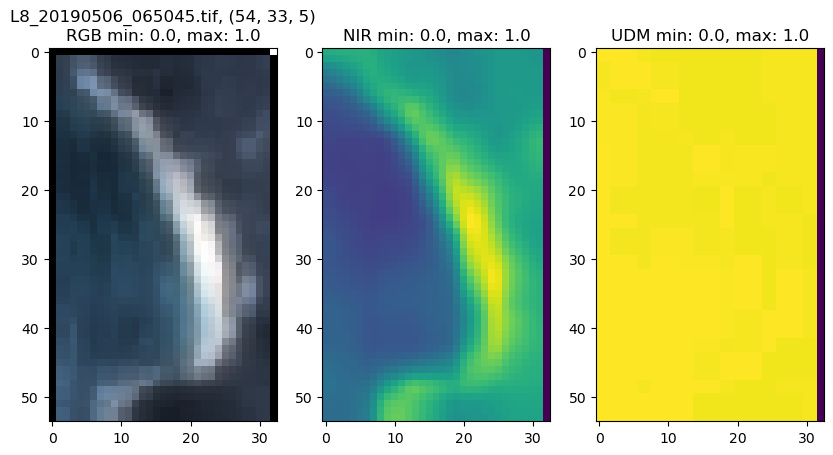

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190404_211919.tif
(5, 52, 31)


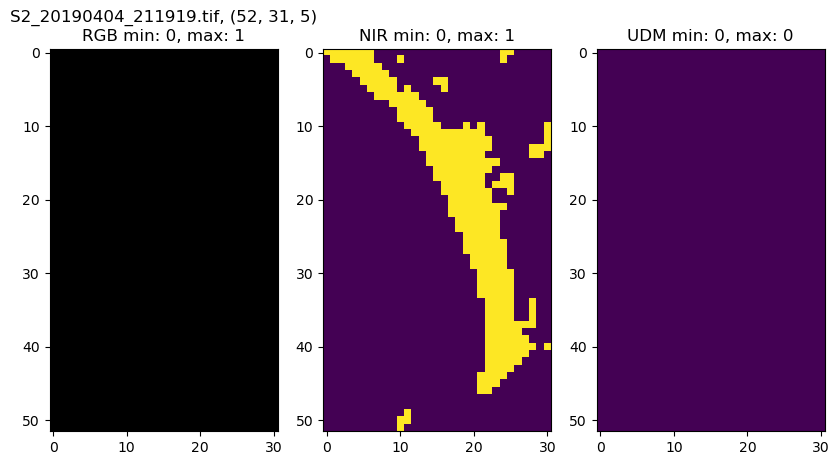

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190409_211921.tif
(5, 52, 31)


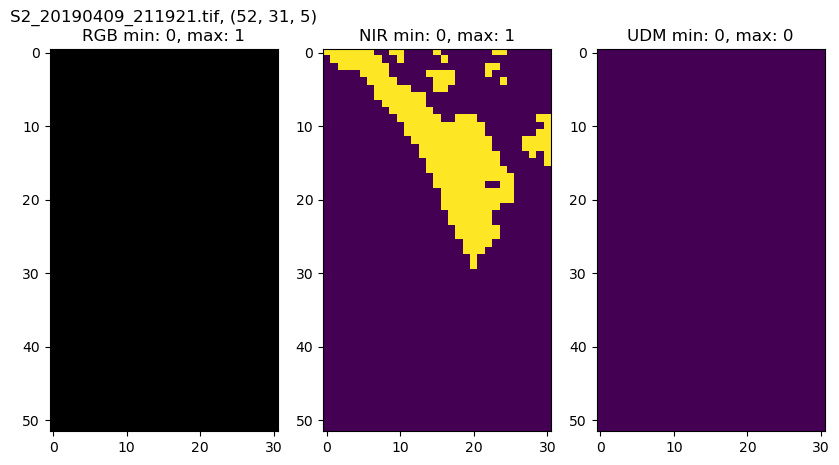

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190414_211919.tif
(5, 52, 31)


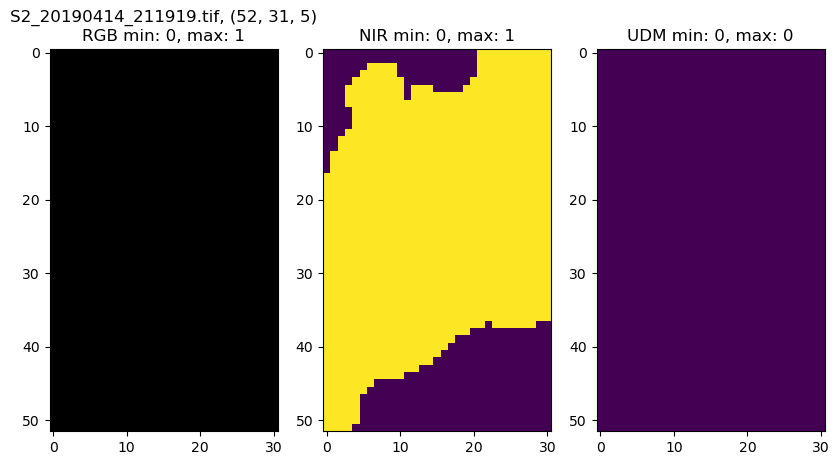

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190419_211921.tif
(5, 52, 31)


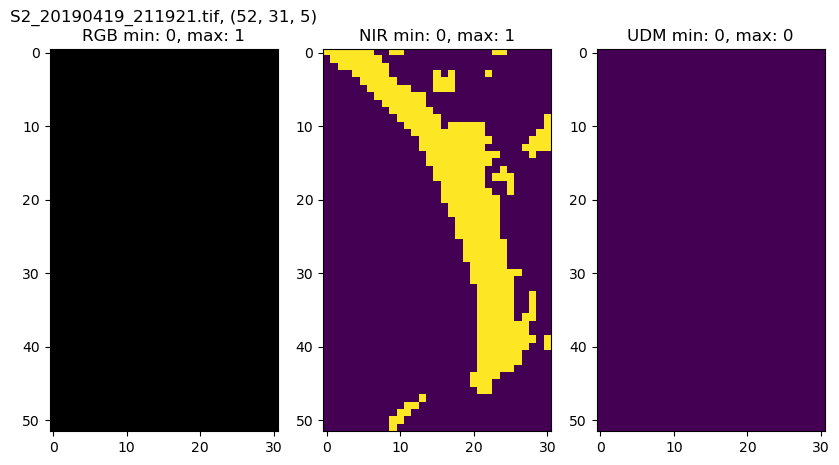

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190424_211929.tif
(5, 52, 31)


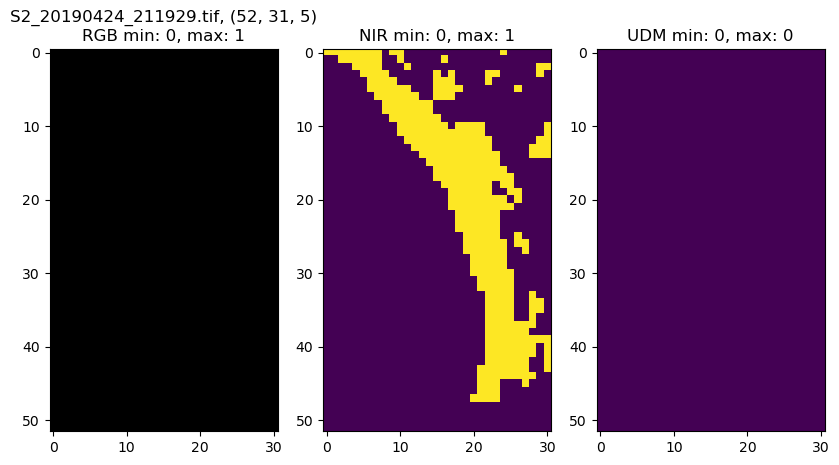

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190429_211921.tif
(5, 52, 31)


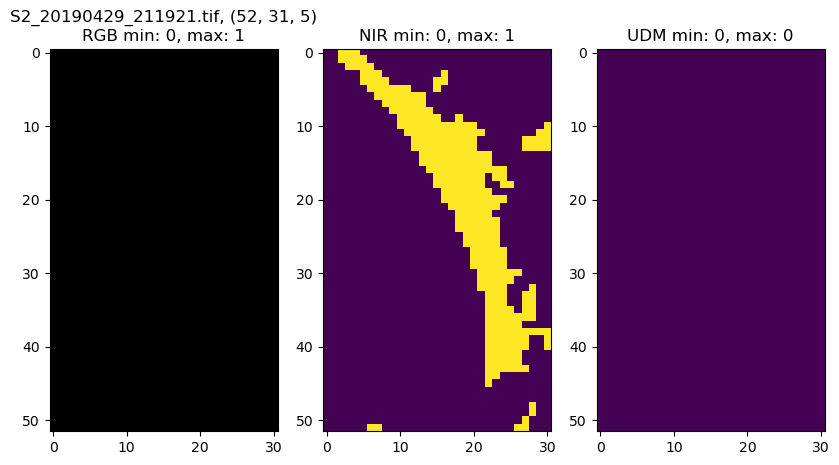

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190504_211929.tif
(5, 52, 31)


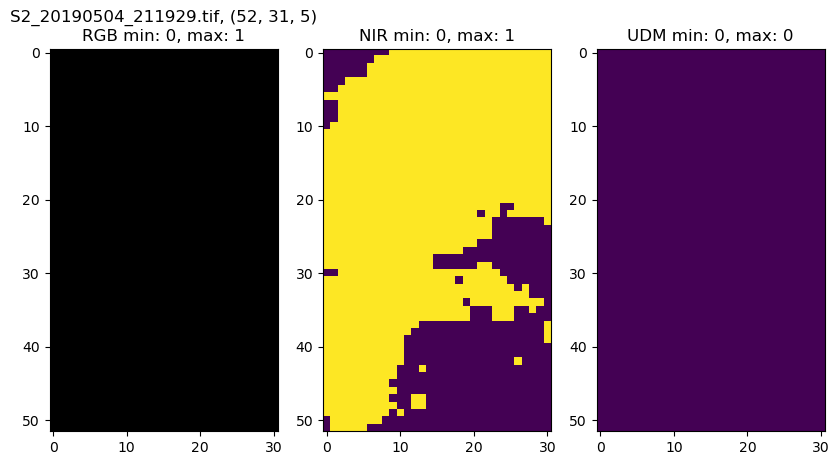

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190509_211921.tif
(5, 52, 31)


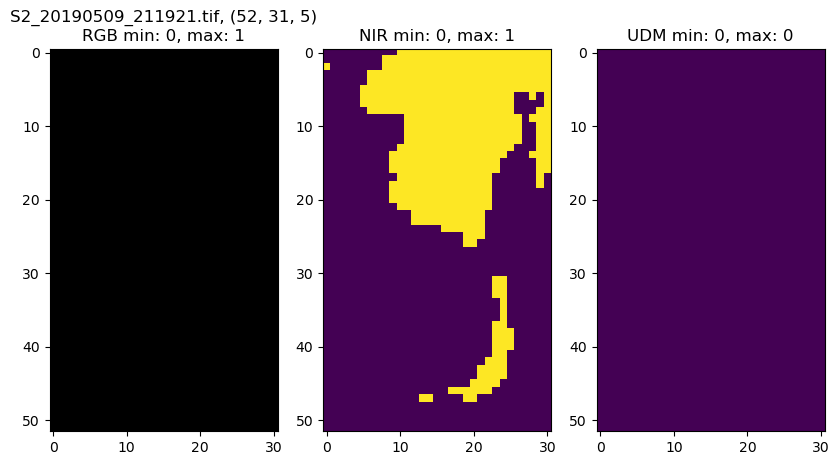

In [5]:
# this goes through and plots each tiff image
from glob import glob
for sitename in sitenames:
    print(f'{sitename}-------------------------------------')
    tiff_fns = glob(os.path.join('data', 'sat_images', sitename, '*', '*.tif'))
    for tiff_fn in tiff_fns:
        plot_scale = 1
        if 'S2' in tiff_fn:
            plot_scale = 10_000
        # else: continue
        print(tiff_fn)
        tiffutils.load_tiff_image(tiff_fn, plot=True, plot_scale=plot_scale)

